# **1. Importacion de librerias principales y carga del dataset**

In [1]:
import pandas as pd #type:ignore
import numpy as np #type:ignore
import seaborn as sns #type:ignore
import matplotlib.pyplot as plt #type:ignore
import plotly as px #type:ignore
import plotly.express as px #type:ignore

In [2]:
dfwine = pd.read_csv("./WineQT.csv")
dfwine

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0               7.4             0.700         0.00             1.9      0.076   
1               7.8             0.880         0.00             2.6      0.098   
2               7.8             0.760         0.04             2.3      0.092   
3              11.2             0.280         0.56             1.9      0.075   
4               7.4             0.700         0.00             1.9      0.076   
...             ...               ...          ...             ...        ...   
1138            6.3             0.510         0.13             2.3      0.076   
1139            6.8             0.620         0.08             1.9      0.068   
1140            6.2             0.600         0.08             2.0      0.090   
1141            5.9             0.550         0.10             2.2      0.062   
1142            5.9             0.645         0.12             2.0      0.075   

      free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                    11.0                  34.0  0.99780  3.51       0.56   
1                    25.0                  67.0  0.99680  3.20       0.68   
2                    15.0                  54.0  0.99700  3.26       0.65   
3                    17.0                  60.0  0.99800  3.16       0.58   
4                    11.0                  34.0  0.99780  3.51       0.56   
...                   ...                   ...      ...   ...        ...   
1138                 29.0                  40.0  0.99574  3.42       0.75   
1139                 28.0                  38.0  0.99651  3.42       0.82   
1140                 32.0                  44.0  0.99490  3.45       0.58   
1141                 39.0                  51.0  0.99512  3.52       0.76   
1142                 32.0                  44.0  0.99547  3.57       0.71   

      alcohol  quality    Id  
0         9.4        5     0  
1         9.8        5     1  
2         9.8        5     2  
3         9.8        6     3  
4         9.4        5     4  
...       ...      ...   ...  
1138     11.0        6  1592  
1139      9.5        6  1593  
1140     10.5        5  1594  
1141     11.2        6  1595  
1142     10.2        5  1597  

[1143 rows x 13 columns]

# **2. Análisis exploratorio de datos**

**Copia de datos**

In [3]:
dfwine1 = dfwine.copy()

**Gráfico**

<Figure size 1200x1200 with 0 Axes>

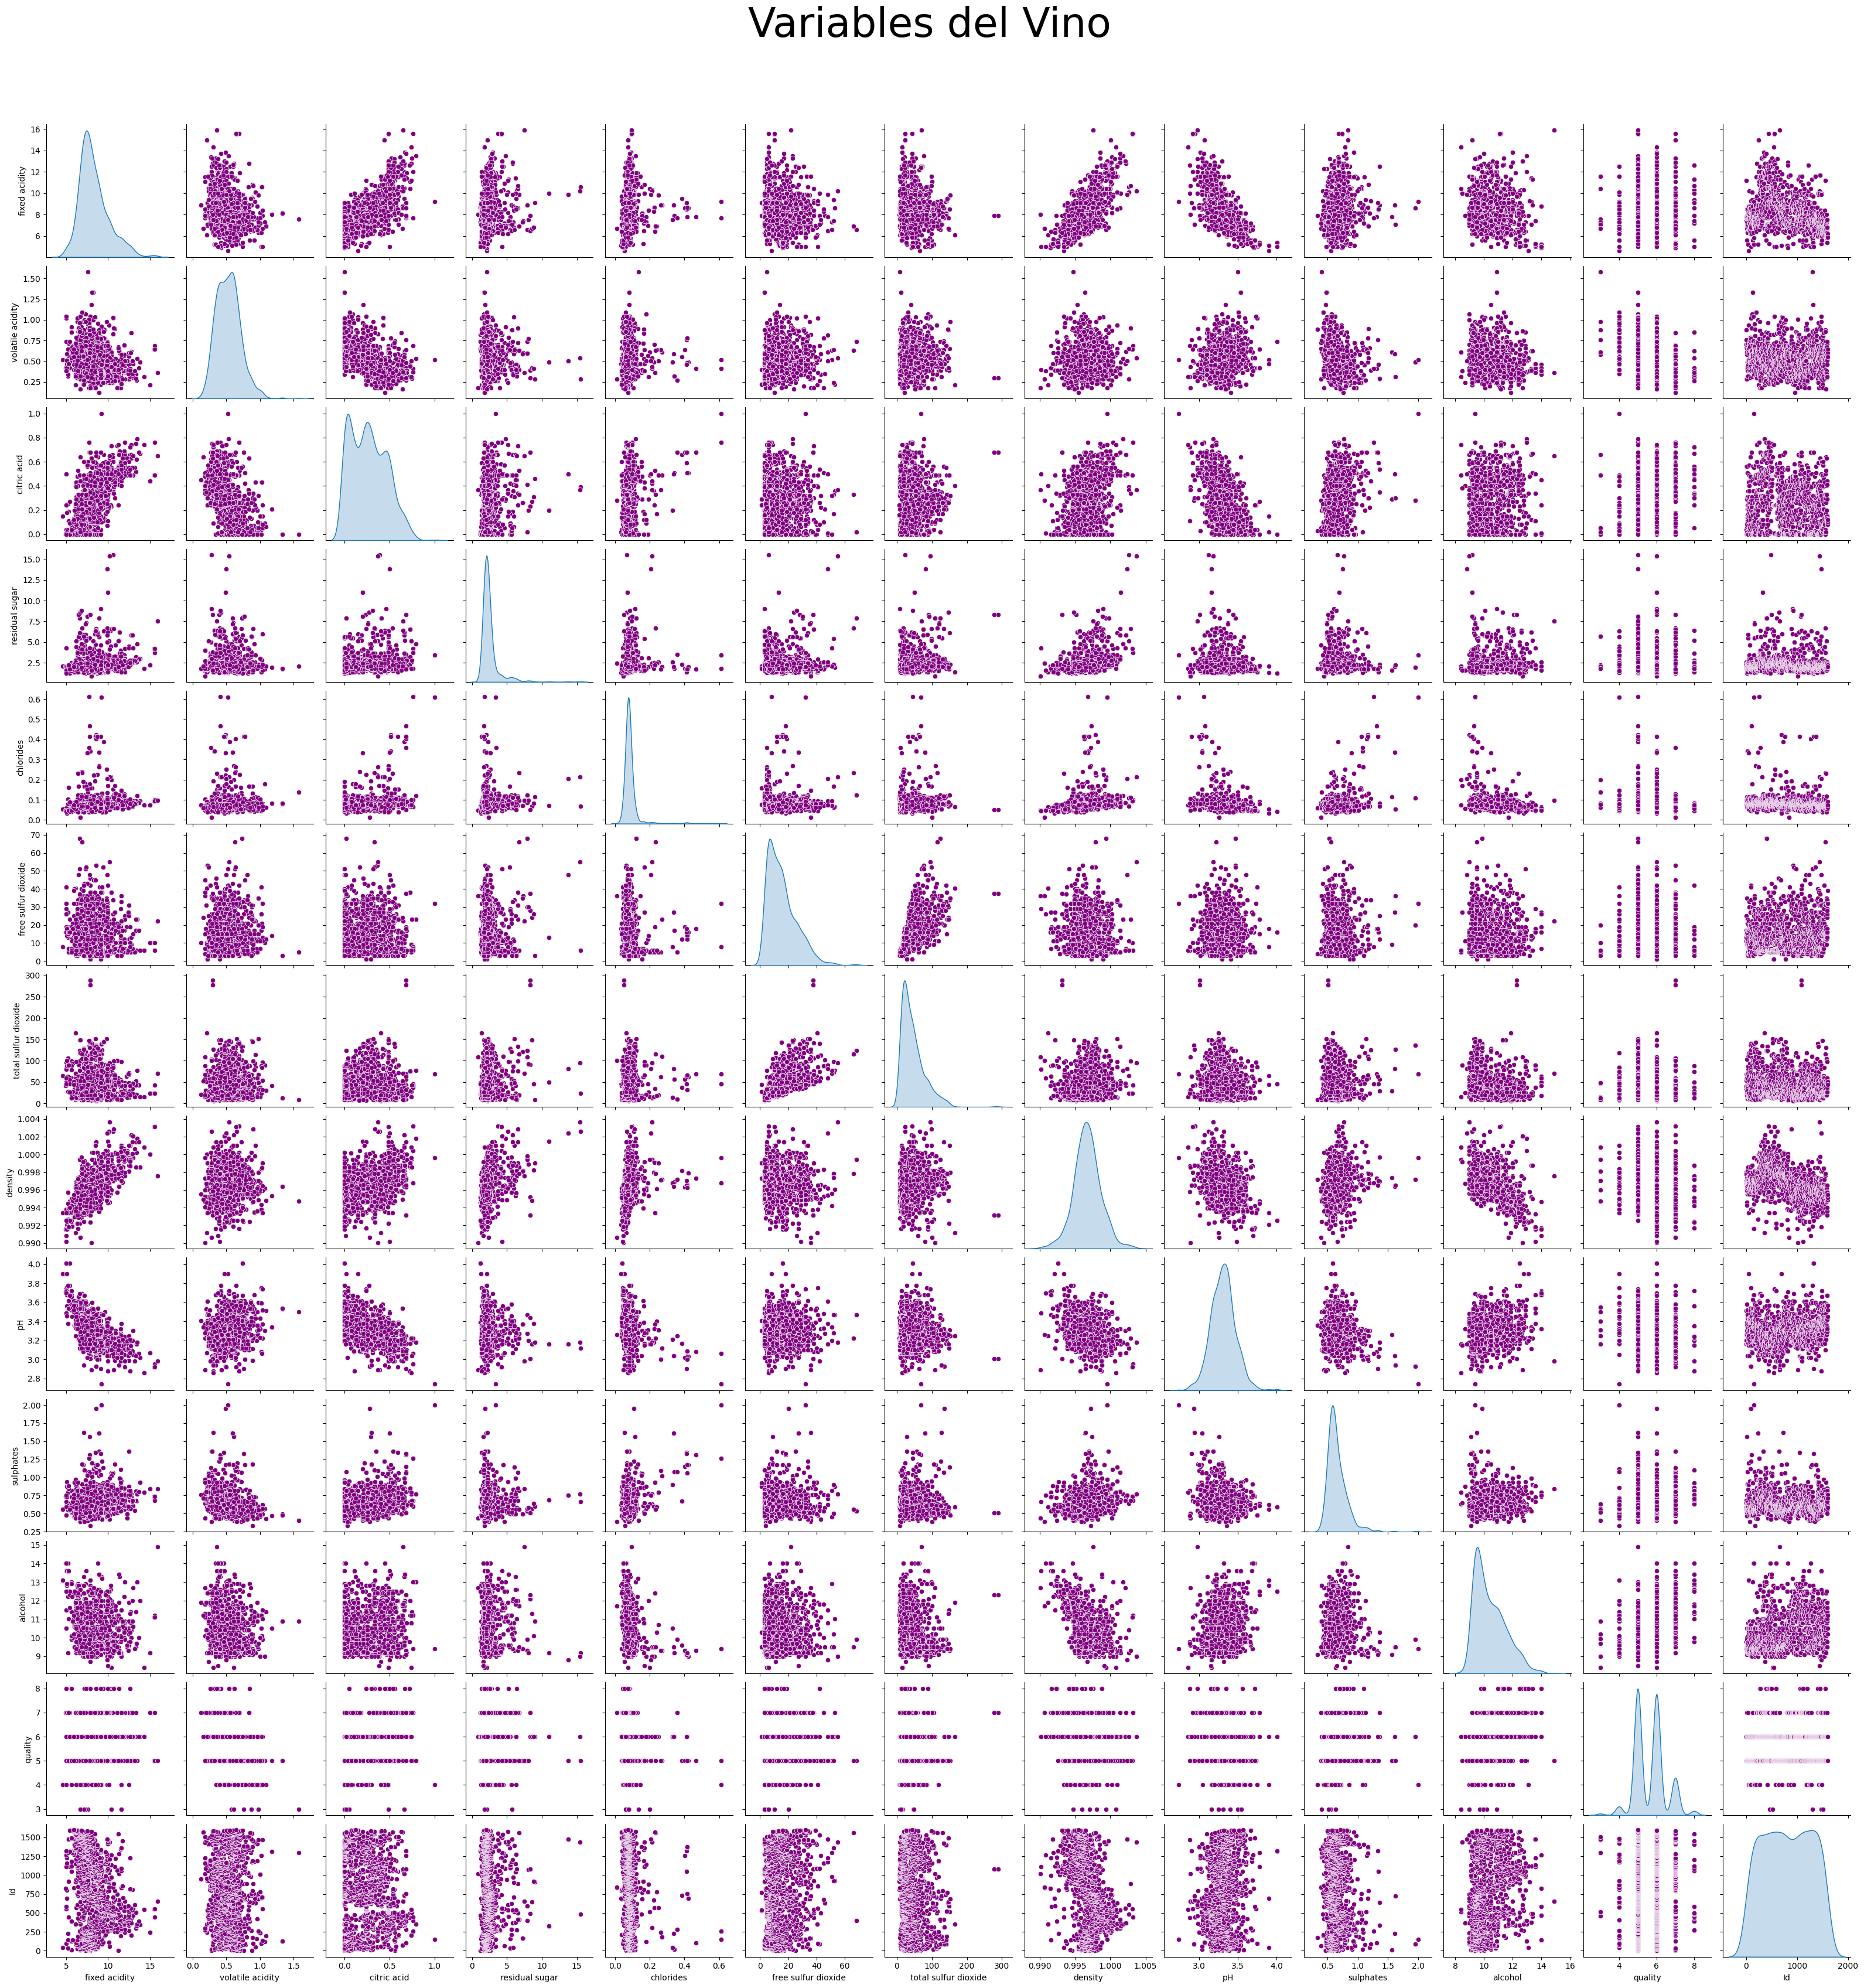

In [4]:
import seaborn as sns #type:ignore
import matplotlib.pyplot as plt #type:ignore

# Crear gráfico Pair Plot
plt.figure(figsize=(12, 12))
sns.pairplot(dfwine1, diag_kind='kde', plot_kws={'color': 'purple'})
plt.suptitle('Variables del Vino', y= 1.05, fontsize=50) 

plt.show()

**Gráfico de correlación inicial**

<Axes: title={'center': 'Correlación con la calidad del vino'}>

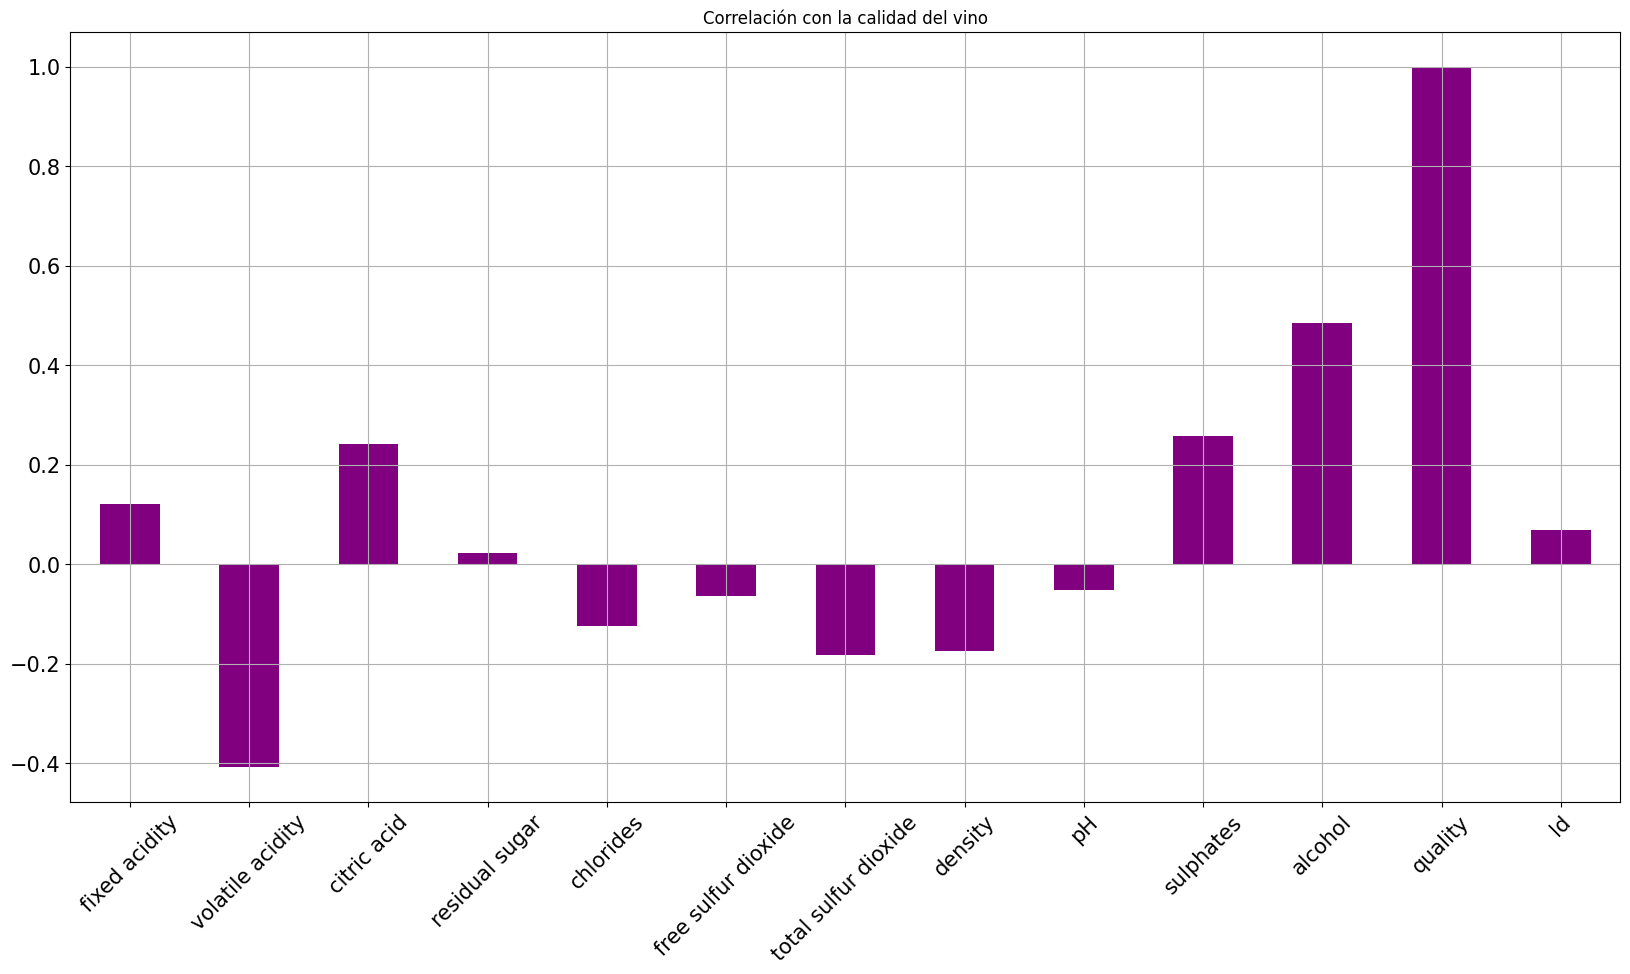

In [5]:
dfwine1.corrwith(dfwine1.quality).plot.bar(
        figsize = (20, 10), title = "Correlación con la calidad del vino", fontsize = 15,
        rot = 45, grid = True, color= "purple")

In [6]:
print(dfwine1.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1143 entries, 0 to 1142
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1143 non-null   float64
 1   volatile acidity      1143 non-null   float64
 2   citric acid           1143 non-null   float64
 3   residual sugar        1143 non-null   float64
 4   chlorides             1143 non-null   float64
 5   free sulfur dioxide   1143 non-null   float64
 6   total sulfur dioxide  1143 non-null   float64
 7   density               1143 non-null   float64
 8   pH                    1143 non-null   float64
 9   sulphates             1143 non-null   float64
 10  alcohol               1143 non-null   float64
 11  quality               1143 non-null   int64  
 12  Id                    1143 non-null   int64  
dtypes: float64(11), int64(2)
memory usage: 116.2 KB
None


In [7]:
dfwine1.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
Id                      0
dtype: int64

**Duplicados**

In [8]:
# Identificar duplicados
duplicados = dfwine1[dfwine1.duplicated(subset = dfwine1.columns.difference(['Id']))] #Se ignora columna 'Id'

# Título 
print("\nFilas duplicadas:") 

# Mostrar filas duplicadas
print(duplicados)


Filas duplicadas:
      fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
4               7.4             0.700         0.00            1.90      0.076   
46              7.2             0.725         0.05            4.65      0.086   
64              8.6             0.490         0.28            1.90      0.110   
65              7.7             0.490         0.26            1.90      0.062   
71              8.1             0.545         0.18            1.90      0.080   
...             ...               ...          ...             ...        ...   
1076            7.5             0.380         0.57            2.30      0.106   
1113            7.8             0.600         0.26            2.00      0.080   
1114            7.8             0.600         0.26            2.00      0.080   
1116            7.2             0.695         0.13            2.00      0.076   
1119            7.2             0.695         0.13            2.00      0.076   

      fr

In [9]:
dfwine1.describe().round(3) #Se reducen decimales

fixed acidity  volatile acidity  citric acid  residual sugar  \
count       1143.000          1143.000     1143.000        1143.000   
mean           8.311             0.531        0.268           2.532   
std            1.748             0.180        0.197           1.356   
min            4.600             0.120        0.000           0.900   
25%            7.100             0.392        0.090           1.900   
50%            7.900             0.520        0.250           2.200   
75%            9.100             0.640        0.420           2.600   
max           15.900             1.580        1.000          15.500   

       chlorides  free sulfur dioxide  total sulfur dioxide   density  \
count   1143.000             1143.000              1143.000  1143.000   
mean       0.087               15.615                45.915     0.997   
std        0.047               10.250                32.782     0.002   
min        0.012                1.000                 6.000     0.990   
25%        0.070                7.000                21.000     0.996   
50%        0.079               13.000                37.000     0.997   
75%        0.090               21.000                61.000     0.998   
max        0.611               68.000               289.000     1.004   

             pH  sulphates   alcohol   quality        Id  
count  1143.000   1143.000  1143.000  1143.000  1143.000  
mean      3.311      0.658    10.442     5.657   804.969  
std       0.157      0.170     1.082     0.806   463.997  
min       2.740      0.330     8.400     3.000     0.000  
25%       3.205      0.550     9.500     5.000   411.000  
50%       3.310      0.620    10.200     6.000   794.000  
75%       3.400      0.730    11.100     6.000  1209.500  
max       4.010      2.000    14.900     8.000  1597.000

**Distribución de variables**

In [10]:
dfwine1.quality.unique()

array([5, 6, 7, 4, 8, 3], dtype=int64)

Clase 3: 6 instancias
Clase 4: 33 instancias
Clase 5: 483 instancias
Clase 6: 462 instancias
Clase 7: 143 instancias
Clase 8: 16 instancias
Porcentaje de instancias de la clase 3: 0.52%
Porcentaje de instancias de la clase 4: 2.89%
Porcentaje de instancias de la clase 5: 42.26%
Porcentaje de instancias de la clase 6: 40.42%
Porcentaje de instancias de la clase 7: 12.51%
Porcentaje de instancias de la clase 8: 1.40%


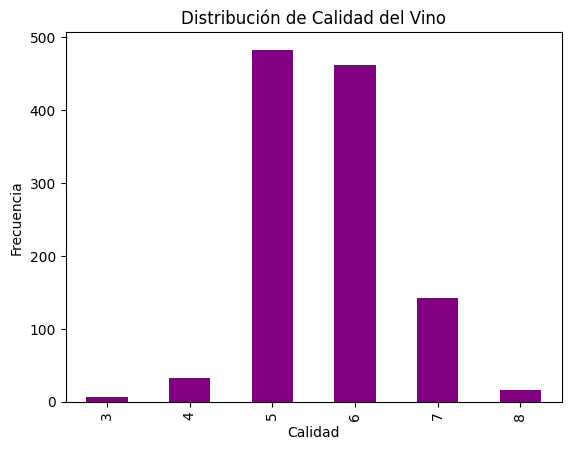

In [11]:
# Calcula e imprime la distribución de clases
clases, conteos = np.unique(dfwine1.quality, return_counts=True)

#Bucle 
for clase, conteo in zip(clases, conteos):
    print(f"Clase {clase}: {conteo} instancias")

# Calcula el porcentaje de clases
total_instancias = len(dfwine1.quality)
for clase, conteo in zip(clases, conteos):
    porcentaje = (conteo / total_instancias) * 100
    print(f"Porcentaje de instancias de la clase {clase}: {porcentaje:.2f}%")

# Verificar la distribución de la variable "quality"
class_distribution = dfwine1['quality'].value_counts().sort_index()
class_distribution.plot(kind='bar', color='purple')
plt.title('Distribución de Calidad del Vino')
plt.xlabel('Calidad')
plt.ylabel('Frecuencia')
plt.show()    

**Sesgo**

In [12]:
# Calcular el sesgo para cada columna
skewness1 = dfwine1.skew()

# Mostrar el sesgo de cada variable
print("Sesgo de cada variable en el dataset:")
print(skewness1)

Sesgo de cada variable en el dataset:
fixed acidity           1.044930
volatile acidity        0.681547
citric acid             0.371561
residual sugar          4.361096
chlorides               6.026360
free sulfur dioxide     1.231261
total sulfur dioxide    1.665766
density                 0.102395
pH                      0.221138
sulphates               2.497266
alcohol                 0.863313
quality                 0.286792
Id                     -0.010419
dtype: float64


**Verificación de valores nulos y negativos**

In [13]:
# NaNs por columna
nulos_col = dfwine1.isnull().sum()
print("Número de NaNs por columna:")
print(nulos_col)

Número de NaNs por columna:
fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
Id                      0
dtype: int64


In [14]:
# Ceros por columna
ceros_col = (dfwine1 == 0).sum()
print("Número de valores cero por columna:")
print(ceros_col)

Número de valores cero por columna:
fixed acidity            0
volatile acidity         0
citric acid             99
residual sugar           0
chlorides                0
free sulfur dioxide      0
total sulfur dioxide     0
density                  0
pH                       0
sulphates                0
alcohol                  0
quality                  0
Id                       1
dtype: int64


In [15]:
# Negativos por columna
negativos_col = (dfwine1 < 0).sum()
print("Número de valores negativos por columna:")
print(negativos_col)
print("\n")

Número de valores negativos por columna:
fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
Id                      0
dtype: int64




**Outliers**

In [16]:
import plotly.graph_objects as go #type:ignore

# Crear el gráfico interactivo
fig = go.Figure()

# Agregar un boxplot para cada columna
for column in dfwine1.columns:
    fig.add_trace(go.Box(
        y=dfwine1[column],
        name=column,
        jitter=0.3,       # Distribución de puntos para mejor visibilidad
        pointpos=-1.5     # Posición de los puntos
    ))

# Personalización
fig.update_layout(
    title="Outliers Dataframe Original",
    xaxis_title="Columnas",
    yaxis_title="Valores",
    template="plotly_dark"
)

# Mostrar gráfico
fig.show()

**Rangos**

In [17]:
# Rangos mínimo y máximo de cada columna
rangos = dfwine1.agg(['min', 'max']).T
rangos.columns = ['Min', 'Max']
print(rangos)

                          Min         Max
fixed acidity         4.60000    15.90000
volatile acidity      0.12000     1.58000
citric acid           0.00000     1.00000
residual sugar        0.90000    15.50000
chlorides             0.01200     0.61100
free sulfur dioxide   1.00000    68.00000
total sulfur dioxide  6.00000   289.00000
density               0.99007     1.00369
pH                    2.74000     4.01000
sulphates             0.33000     2.00000
alcohol               8.40000    14.90000
quality               3.00000     8.00000
Id                    0.00000  1597.00000


In [18]:
len(dfwine1) 


1143

In [19]:
dfwine1['Id'].nunique()

1143

# **3. Data Wrangling**

**Eliminación de columna "Id"**

In [20]:
dfwine2 = dfwine1.loc[:, ~ dfwine.columns.str.startswith('Id')] # Se elimina la columna ID por no aportar información útil.
dfwine2.sample (1)

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
788            7.0              0.69         0.07             2.5      0.091   

     free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
788                 15.0                  21.0  0.99572  3.38        0.6   

     alcohol  quality  
788     11.3        6

**Duplicados**

In [21]:
dfwine3 = dfwine2.loc[~dfwine2.duplicated()] #Se eliminan duplicados

In [22]:
len(dfwine3) 

1018

**Modificación de nombres**

In [23]:
dfwine3 = dfwine3.rename(columns=lambda x: x.replace(' ', '_')) #Se agrega el caracter '_' 
dfwine3.sample (3)

fixed_acidity  volatile_acidity  citric_acid  residual_sugar  chlorides  \
262            9.4              0.27         0.53             2.4      0.074   
217           11.1              0.18         0.48             1.5      0.068   
462           15.9              0.36         0.65             7.5      0.096   

     free_sulfur_dioxide  total_sulfur_dioxide  density    pH  sulphates  \
262                  6.0                  18.0   0.9962  3.20       1.13   
217                  7.0                  15.0   0.9973  3.22       0.64   
462                 22.0                  71.0   0.9976  2.98       0.84   

     alcohol  quality  
262     12.0        7  
217     10.1        6  
462     14.9        5

**Copia de datos**

In [24]:
dfwine4 = dfwine3.copy()

In [25]:
len(dfwine4)

1018

**Conversión**

In [26]:
dfwine4['quality'] = (dfwine4['quality'] >= 6).astype(int) #Quality mayor e igual a 6 es "Calidad Alta (1)"

In [27]:
# Calcula e imprime la distribución de clases
clases, conteos = np.unique(dfwine4.quality, return_counts=True)

#Bucle
for clase, conteo in zip(clases, conteos):
    print(f"Clase {clase}: {conteo} instancias")

# Calcula el porcentaje de clases
total_instancias = len(dfwine4.quality)
for clase, conteo in zip(clases, conteos):
    porcentaje = (conteo / total_instancias) * 100
    print(f"Porcentaje de instancias de la clase {clase}: {porcentaje:.2f}%")

Clase 0: 472 instancias
Clase 1: 546 instancias
Porcentaje de instancias de la clase 0: 46.37%
Porcentaje de instancias de la clase 1: 53.63%


In [28]:
dfwine4[dfwine4['quality'] >= 1].sample(3) #Filtro

fixed_acidity  volatile_acidity  citric_acid  residual_sugar  chlorides  \
358           10.2              0.49         0.63             2.9      0.072   
932            7.5              0.63         0.27             2.0      0.083   
748            8.0              0.38         0.44             1.9      0.098   

     free_sulfur_dioxide  total_sulfur_dioxide  density    pH  sulphates  \
358                 10.0                  26.0  0.99680  3.16       0.78   
932                 17.0                  91.0  0.99616  3.26       0.58   
748                  6.0                  15.0  0.99560  3.30       0.64   

     alcohol  quality  
358     12.5        1  
932      9.8        1  
748     11.4        1

In [29]:
dfwine4[dfwine4['quality'] <= 0].sample(3) #Filtro

fixed_acidity  volatile_acidity  citric_acid  residual_sugar  chlorides  \
606            9.3             0.430         0.44             1.9      0.085   
54             8.3             0.625         0.20             1.5      0.080   
572           10.8             0.890         0.30             2.6      0.132   

     free_sulfur_dioxide  total_sulfur_dioxide  density    pH  sulphates  \
606                  9.0                  22.0  0.99708  3.28       0.55   
54                  27.0                 119.0  0.99720  3.16       1.12   
572                  7.0                  60.0  0.99786  2.99       1.18   

     alcohol  quality  
606      9.5        0  
54       9.1        0  
572     10.2        0

**Transformación sesgo**

In [30]:
from scipy.stats import skew #type:ignore

In [31]:
#Sesgo del dataframe original
print(skewness1[skewness1 > 0.5]) 

fixed acidity           1.044930
volatile acidity        0.681547
residual sugar          4.361096
chlorides               6.026360
free sulfur dioxide     1.231261
total sulfur dioxide    1.665766
sulphates               2.497266
alcohol                 0.863313
dtype: float64


In [32]:
# Sesgo del dataframe modificado
skewness2 = dfwine4.skew()

# Mostrar el sesgo de cada variable
print("Sesgo de cada variable en el dataset:")
print(skewness2)

Sesgo de cada variable en el dataset:
fixed_acidity           1.037193
volatile_acidity        0.719668
citric_acid             0.368824
residual_sugar          4.350318
chlorides               5.933225
free_sulfur_dioxide     1.172090
total_sulfur_dioxide    1.680327
density                 0.091874
pH                      0.257993
sulphates               2.424667
alcohol                 0.848859
quality                -0.145984
dtype: float64


**Transformación Yeo-Johnson**

In [33]:
dfwine4.columns

Index(['fixed_acidity', 'volatile_acidity', 'citric_acid', 'residual_sugar',
       'chlorides', 'free_sulfur_dioxide', 'total_sulfur_dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

In [34]:
from sklearn.preprocessing import PowerTransformer #type:ignore

# Columnas a transformar
transf_col = ['fixed_acidity', 'volatile_acidity', 'citric_acid', 'residual_sugar',
              'chlorides', 'free_sulfur_dioxide', 'total_sulfur_dioxide', 'pH',
              'sulphates', 'alcohol', 'density']

# Columnas que no se transformarán
no_transf_col  = ['quality']

# Crear el objeto PowerTransformer
pt = PowerTransformer(method='yeo-johnson', standardize=True)

# Ajustar y transformar los datos
transf_data = pd.DataFrame(pt.fit_transform(dfwine4[transf_col]), columns=transf_col)

# Combinar las columnas transformadas con las no transformadas
dfwine_yeo = pd.concat([transf_data, dfwine4[no_transf_col].reset_index(drop=True)], axis=1)

# Mostrar el número de filas y columnas del DataFrame resultante
print("Dimensiones del DataFrame después de la transformación y concatenación:", dfwine_yeo.shape)

# Mostrar el DataFrame resultante
print(dfwine_yeo.head())



Dimensiones del DataFrame después de la transformación y concatenación: (1018, 12)
   fixed_acidity  volatile_acidity  citric_acid  residual_sugar  chlorides  \
0      -0.423933          0.956156    -1.524454       -0.606853  -0.149245   
1      -0.144776          1.709649    -1.524454        0.554671   0.799998   
2      -0.144776          1.223501    -1.242402        0.147892   0.576678   
3       1.540375         -1.570944     1.394449       -0.606853  -0.201876   
4      -0.423933          0.767791    -1.524454       -0.848675  -0.201876   

   free_sulfur_dioxide  total_sulfur_dioxide        pH  sulphates   alcohol  \
0            -0.253808             -0.115123  1.245574  -0.584067 -1.074464   
1             1.020349              0.861428 -0.693726   0.414388 -0.516124   
2             0.212238              0.548541 -0.299469   0.199640 -0.516124   
3             0.405770              0.701122 -0.961991  -0.389394 -0.516124   
4            -0.005250              0.116759  1.24557

In [35]:
# Calcular el sesgo para cada columna
skewness_yeo = dfwine_yeo.skew()

# Mostrar sesgo original vs modificado
print("Sesgo antes de la transformación:")
print(skewness1, "\n""--------------------------------")
print("Sesgo luego de la transformación:")
print(skewness_yeo)

Sesgo antes de la transformación:
fixed acidity           1.044930
volatile acidity        0.681547
citric acid             0.371561
residual sugar          4.361096
chlorides               6.026360
free sulfur dioxide     1.231261
total sulfur dioxide    1.665766
density                 0.102395
pH                      0.221138
sulphates               2.497266
alcohol                 0.863313
quality                 0.286792
Id                     -0.010419
dtype: float64 
--------------------------------
Sesgo luego de la transformación:
fixed_acidity          -0.005527
volatile_acidity        0.005721
citric_acid             0.024804
residual_sugar         -0.003634
chlorides              -0.116314
free_sulfur_dioxide    -0.010508
total_sulfur_dioxide   -0.002095
pH                     -0.006657
sulphates               0.005473
alcohol                 0.110344
density                -0.006209
quality                -0.145984
dtype: float64


In [36]:
dfwine_yeo.sample(3)

fixed_acidity  volatile_acidity  citric_acid  residual_sugar  chlorides  \
223      -0.212366          0.791804    -1.524454        0.295683   0.496823   
79       -0.144776         -0.080242    -0.425252       -1.420127   0.147486   
184      -0.351896         -0.702904    -0.723120        0.959521   0.576678   

     free_sulfur_dioxide  total_sulfur_dioxide        pH  sulphates   alcohol  \
223            -0.710570             -0.931452 -0.234686   0.730705 -1.229930   
79              0.739191              1.476240  0.522846  -1.509797 -0.925687   
184             1.263819              0.521522  0.399078   0.546775  0.061312   

      density  quality  
223  0.375734        0  
79  -0.355540        0  
184  0.011617        1

In [37]:
# Negativos por columna
negativos_col_yeo = (dfwine_yeo < 0).sum()
print("Número de valores negativos por columna:")
print(negativos_col_yeo)
print("\n")

Número de valores negativos por columna:
fixed_acidity           551
volatile_acidity        492
citric_acid             497
residual_sugar          559
chlorides               495
free_sulfur_dioxide     510
total_sulfur_dioxide    491
pH                      500
sulphates               540
alcohol                 529
density                 510
quality                   0
dtype: int64




In [38]:
# NaNs por columna
nulos_col_yeo = dfwine_yeo.isnull().sum()
print("Número de NaNs por columna:")
print(nulos_col_yeo)

Número de NaNs por columna:
fixed_acidity           0
volatile_acidity        0
citric_acid             0
residual_sugar          0
chlorides               0
free_sulfur_dioxide     0
total_sulfur_dioxide    0
pH                      0
sulphates               0
alcohol                 0
density                 0
quality                 0
dtype: int64


**Pruebas para eliminar variables**

**Correlación**

<Axes: title={'center': 'Correlación con la calidad del vino'}>

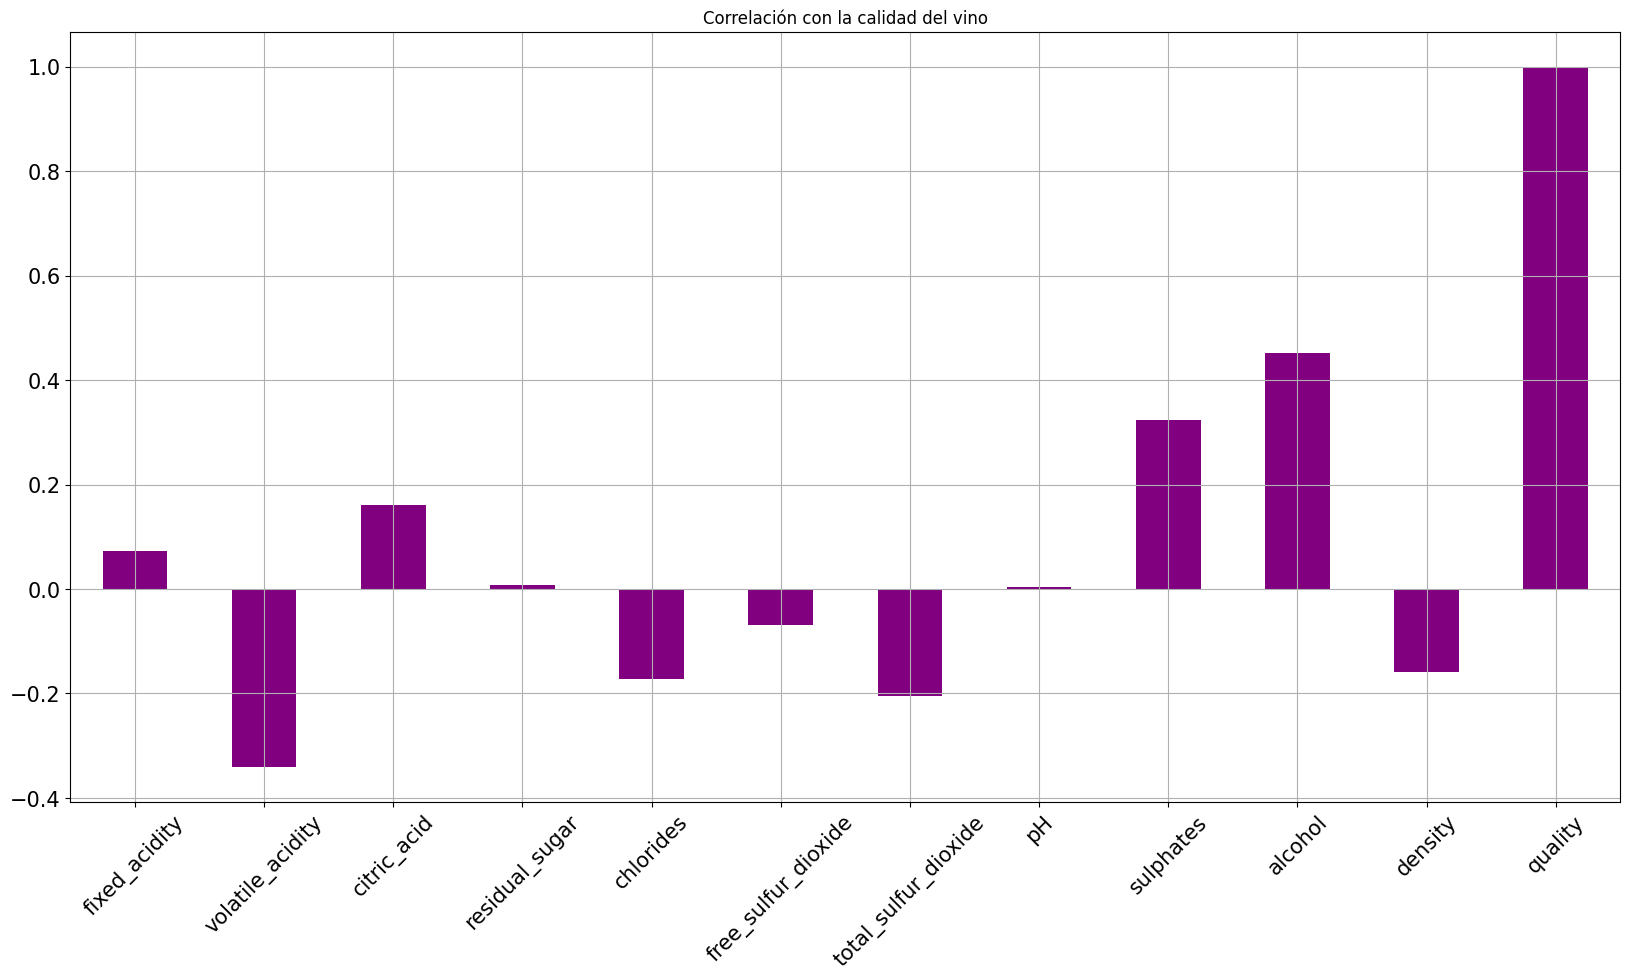

In [39]:
dfwine_yeo.corrwith(dfwine_yeo.quality).plot.bar(
        figsize = (20, 10), title = "Correlación con la calidad del vino", fontsize = 15,
        rot = 45, grid = True, color= "purple")

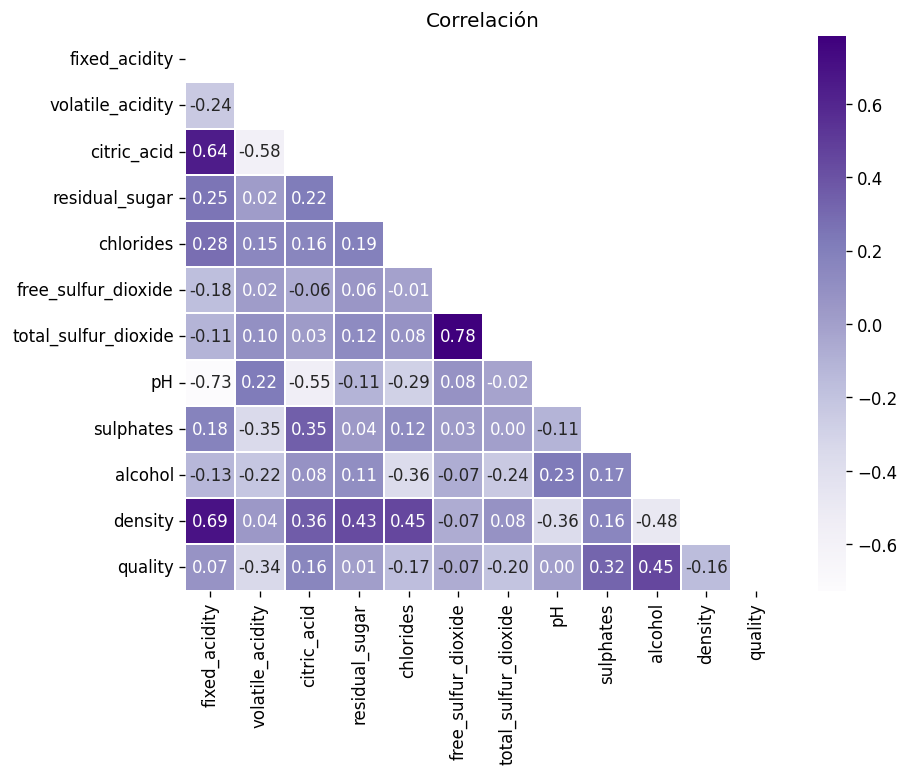

In [40]:
plt.figure(dpi = 120,figsize= (8,6))
mask = np.triu(np.ones_like(dfwine_yeo.corr(),dtype = bool))
sns.heatmap(dfwine_yeo.corr(),mask = mask, fmt = ".2f",annot=True,lw=1,cmap = 'Purples')  
plt.yticks(rotation = 0)
plt.xticks(rotation = 90)
plt.title('Correlación')

plt.show()

**VIF (Factor de Inflación de la Varianza)-Multicolinealidad**

In [41]:
from statsmodels.stats.outliers_influence import variance_inflation_factor #type:ignore
import statsmodels.api as sm #type:ignore

# Seleccionar las variables 
X = dfwine_yeo[['fixed_acidity', 'volatile_acidity', 'residual_sugar', 'chlorides', 
                'free_sulfur_dioxide', 'total_sulfur_dioxide', 'sulphates', 'alcohol', 
                'citric_acid', 'density', 'pH']]

# Añadir constante al modelo
X = sm.add_constant(X) #Crea una columna nueva con valores 1.

# Calcular el VIF
vif_data = pd.DataFrame()
vif_data['Feature'] = X.columns
vif_data['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

# Mostrar resultados
print(vif_data)


                 Feature       VIF
0                  const  1.000000
1          fixed_acidity  6.946941
2       volatile_acidity  1.920605
3         residual_sugar  1.780035
4              chlorides  1.438720
5    free_sulfur_dioxide  2.878308
6   total_sulfur_dioxide  3.206923
7              sulphates  1.386749
8                alcohol  2.893141
9            citric_acid  2.957055
10               density  6.239853
11                    pH  3.315556


In [42]:
X

const  fixed_acidity  volatile_acidity  residual_sugar  chlorides  \
0       1.0      -0.423933          0.956156       -0.606853  -0.149245   
1       1.0      -0.144776          1.709649        0.554671   0.799998   
2       1.0      -0.144776          1.223501        0.147892   0.576678   
3       1.0       1.540375         -1.570944       -0.606853  -0.201876   
4       1.0      -0.423933          0.767791       -0.848675  -0.201876   
...     ...            ...               ...             ...        ...   
1013    1.0      -1.334277         -0.022270        0.147892  -0.149245   
1014    1.0      -0.891418          0.570643       -0.606853  -0.598045   
1015    1.0      -1.429571          0.468578       -0.389147   0.496823   
1016    1.0      -1.730547          0.202537       -0.014192  -0.979883   
1017    1.0      -1.730547          0.694923       -0.389147  -0.201876   

      free_sulfur_dioxide  total_sulfur_dioxide  sulphates   alcohol  \
0               -0.253808             -0.115123  -0.584067 -1.074464   
1                1.020349              0.861428   0.414388 -0.516124   
2                0.212238              0.548541   0.199640 -0.516124   
3                0.405770              0.701122  -0.389394 -0.516124   
4               -0.005250              0.116759  -0.584067 -1.074464   
...                   ...                   ...        ...       ...   
1013             1.263819              0.116759   0.844352  0.697105   
1014             1.205919              0.043416   1.193016 -0.925687   
1015             1.427336              0.253409  -0.389394  0.261214   
1016             1.760715              0.465971   0.898671  0.849306   
1017             1.427336              0.253409   0.609968 -0.044856   

      citric_acid   density        pH  
0       -1.524454  0.582446  1.245574  
1       -1.524454  0.063819 -0.693726  
2       -1.242402  0.168038 -0.299469  
3        1.394449  0.685434 -0.961991  
4       -1.524454  0.582446  1.245574  
...           ...       ...       ...  
1013    -0.662012 -0.492692  0.706691  
1014    -0.975746 -0.087738  0.706691  
1015    -0.975746 -0.938707  0.888401  
1016    -0.847758 -0.821463  1.304309  
1017    -0.723120 -0.635569  1.594664  

[1018 rows x 12 columns]

**Elastic Net**

In [43]:
from sklearn.linear_model import LogisticRegression #type:ignore
from sklearn.model_selection import train_test_split #type:ignore

#Separación de variables 
x_prueba = dfwine_yeo.drop('quality',axis=1) 
y_prueba = dfwine_yeo['quality'] 

# División del datasets modificado
X_train_prueba, X_test_prueba, y_train_prueba, y_test_prueba = train_test_split(x_prueba, y_prueba, stratify=y_prueba, test_size=0.2, random_state=42) 

# Crear y ajustar modelo 
elastic_net_log_reg = LogisticRegression(penalty='elasticnet', solver='saga', l1_ratio=0.5, max_iter=10000)
elastic_net_log_reg.fit(X_train_prueba, y_train_prueba)

# Obtener los coeficientes y los nombres de las características
coef = elastic_net_log_reg.coef_[0]
feature_names = X_train_prueba.columns

# Combinar en un DataFrame para una mejor visualización 
coef_df = pd.DataFrame({'Feature': feature_names, 'Coefficient': coef})

# Mostrar todas las características y sus coeficientes
print(coef_df)


                 Feature  Coefficient
0          fixed_acidity     0.424142
1       volatile_acidity    -0.602898
2            citric_acid    -0.342371
3         residual_sugar    -0.026151
4              chlorides    -0.048395
5    free_sulfur_dioxide     0.235047
6   total_sulfur_dioxide    -0.390700
7                     pH     0.000000
8              sulphates     0.608085
9                alcohol     0.859339
10               density    -0.202695


**Model-based feature**

Importancia de las características:
 1) fixed_acidity                  0.184099
 2) volatile_acidity               0.135998
 3) citric_acid                    0.105740
 4) residual_sugar                 0.094992
 5) chlorides                      0.094122
 6) free_sulfur_dioxide            0.074560
 7) total_sulfur_dioxide           0.066873
 8) pH                             0.064930
 9) sulphates                      0.063510
10) alcohol                        0.058100
11) density                        0.057076


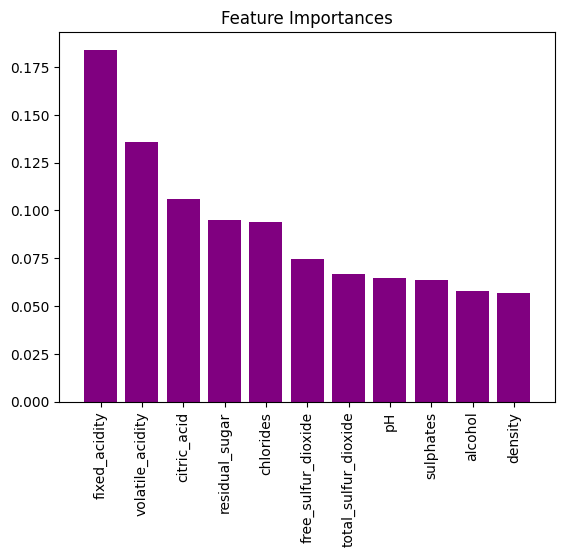

In [44]:
from sklearn.ensemble import RandomForestClassifier #type:ignore

# Crear el modelo 
modelrf = RandomForestClassifier(n_estimators=100, random_state=42)

# Ajustar el modelo
modelrf.fit(X_train_prueba, y_train_prueba)

# Obtener la importancia de las características
importances = modelrf.feature_importances_
indices = np.argsort(importances)[::-1] #Array de índices ordenados en orden descendente.

features_label = dfwine_yeo.columns[:11] #Cantidad de columnas 

# Mostrar las características más importantes
print("Importancia de las características:")
for f in range(X_train_prueba.shape[1]):
     print ("%2d) %-*s %f" % (f + 1, 30, features_label[f],importances[indices[f]]))

#Visualización
plt.title('Feature Importances')
plt.bar(range(X_train_prueba.shape[1]),importances[indices], color="purple", align="center")
plt.xticks(range(X_train_prueba.shape[1]),features_label, rotation=90)
plt.xlim([-1, X_train_prueba.shape[1]])

plt.show()     

**Eliminación de variables**

In [45]:
#Variables a eliminar
columnas_a_eliminar_1 = ['pH', 'density', 'residual_sugar', 'chlorides']
dfwine_fin= dfwine_yeo.drop(columns=columnas_a_eliminar_1, axis=1)
dfwine_fin.sample (3)

fixed_acidity  volatile_acidity  citric_acid  free_sulfur_dioxide  \
756      -1.429571         -0.507465    -0.145395             0.739191   
706      -0.649769         -0.769821    -0.723120             0.106868   
508       0.461389          0.670353    -0.425252             1.020349   

     total_sulfur_dioxide  sulphates   alcohol  quality  
756              0.601153  -0.207205 -0.925687        1  
706             -0.606656  -0.901764  1.932585        1  
508              1.833814  -0.792253 -0.783252        0

In [46]:
# Calcula e imprime la distribución de clases
clases, conteos = np.unique(dfwine_fin.quality, return_counts=True)

#Bucle
for clase, conteo in zip(clases, conteos):
    print(f"Clase {clase}: {conteo} instancias")

# Calcula el porcentaje de clases
total_instancias = len(dfwine_fin.quality)
for clase, conteo in zip(clases, conteos):
    porcentaje = (conteo / total_instancias) * 100
    print(f"Porcentaje de instancias de la clase {clase}: {porcentaje:.2f}%")

Clase 0: 472 instancias
Clase 1: 546 instancias
Porcentaje de instancias de la clase 0: 46.37%
Porcentaje de instancias de la clase 1: 53.63%


In [47]:
dfwine_fin.columns

Index(['fixed_acidity', 'volatile_acidity', 'citric_acid',
       'free_sulfur_dioxide', 'total_sulfur_dioxide', 'sulphates', 'alcohol',
       'quality'],
      dtype='object')

In [48]:
dfwine_fin.sample(1)

fixed_acidity  volatile_acidity  citric_acid  free_sulfur_dioxide  \
216      -0.144776         -0.507465       0.3671             1.263819   

     total_sulfur_dioxide  sulphates   alcohol  quality  
216              0.651974   0.123412  0.061312        0

# **4. PCA**

In [49]:
from sklearn.decomposition import PCA #type:ignore
from sklearn.preprocessing import RobustScaler #type:ignore

# Separación de variables
X_pca = dfwine_fin.drop('quality', axis=1)
y_pca = dfwine_fin['quality']

# División del datasets modificado
X_train_pca, X_test_pca, y_train_pca, y_test_pca = train_test_split(X_pca, y_pca, stratify=y_pca, test_size=0.2, random_state=42)

# Escalado
scaler = RobustScaler()
data_scaled = scaler.fit_transform(X_train_pca)

# Aplicar PCA
pca = PCA(n_components=5)  # Número de componentes principales a retener
principal_components = pca.fit_transform(data_scaled)

# Crear un DataFrame con los componentes principales
df_pca = pd.DataFrame(data=principal_components, columns=['PC1', 'PC2', 'PC3', 'PC4', 'PC5'])

# Mostrar los resultados
print("Componentes principales:")
print(df_pca.head(2))
print("\nProporción de varianza explicada por cada componente principal:")
print(pca.explained_variance_ratio_)


Componentes principales:
        PC1       PC2       PC3       PC4       PC5
0 -0.615860  0.084962  0.928519  1.291821 -0.310482
1  0.901488 -1.170957  0.015399 -1.183162  0.860268

Proporción de varianza explicada por cada componente principal:
[0.34320185 0.2408266  0.17639535 0.10850788 0.07811333]


In [71]:
from sklearn.model_selection import RandomizedSearchCV #type:ignore
from sklearn.pipeline import Pipeline #type:ignore
from sklearn.ensemble import GradientBoostingClassifier #type:ignore
import scipy.stats as st #type:ignore
from scipy.stats import randint, uniform #type:ignore
from sklearn.model_selection import cross_val_score #type:ignore
from sklearn.model_selection import KFold #type:ignore
from sklearn.metrics import accuracy_score, f1_score, roc_auc_score #type:ignore

# Crear pipeline
pipelines_pca = {
    'Gradient': Pipeline([('scaler', RobustScaler()), ('pca', PCA(n_components=4)), ('clf', GradientBoostingClassifier())]) 
}

# Definir hiperparámetros para búsqueda aleatoria
param_pca = {
        'Gradient': {
        'clf__n_estimators': st.randint(1, 500),
        'clf__max_depth': st.randint(1, 10),
        'clf__min_samples_split': st.randint(2, 20),
        'clf__min_samples_leaf': st.randint(1, 20),
        'clf__random_state': st.randint(0, 100),
        'clf__subsample': st.uniform(0.1, 0.9),
        'clf__criterion': ['friedman_mse', 'squared_error'],
        'clf__learning_rate': st.uniform(0.01, 0.99)
    
    }
}

#Kfold
kf = KFold(n_splits=5, shuffle=True, random_state=42)

# Realizar búsqueda aleatoria para cada modelo
random_searches = {name: RandomizedSearchCV(pipelines_pca[name], param_pca[name], n_iter=100, cv=kf, random_state=42, n_jobs=-1, error_score='raise')
                   for name in pipelines_pca.keys()}

# Ajustar modelos y almacenar métricas y mejores parámetros
metrics_results = []
best_params_results = []

for name, search in random_searches.items():
    search.fit(X_train_pca, y_train_pca)
    best_model_pca = search.best_estimator_
    
    #Métricas
    cv_accuracies = cross_val_score(best_model_pca, X_train_pca, y_train_pca, cv=kf, scoring='accuracy')
    cv_f1_scores = cross_val_score(best_model_pca, X_train_pca, y_train_pca, cv=kf, scoring='f1')
    cv_recall = cross_val_score(best_model_pca, X_train_pca, y_train_pca, cv=kf, scoring='recall')
    cv_precis = cross_val_score(best_model_pca, X_train_pca, y_train_pca, cv=kf, scoring='precision')
    cv_roc_aucs = cross_val_score(best_model_pca, X_train_pca, y_train_pca, cv=kf, scoring='roc_auc')
    model_std = np.std(cv_roc_aucs)
    
    #Resultados
    metrics_results.append({
        'Model': name,
        'Accuracy': cv_accuracies.mean(),
        'F1 Score': cv_f1_scores.mean(),
        'Recall': cv_recall.mean(),
        'Precision': cv_precis.mean(),
        'Roc auc': cv_roc_aucs.mean(),
        'Std': model_std
    })

    best_params_results.append({
        'Model': name,
        'Mejores Parámetros': search.best_params_
    })

# Crear dataframes y mostrar resultados
df_metrics_pca = pd.DataFrame(metrics_results)
df_best_params_pca = pd.DataFrame(best_params_results)

print("Mejores parámetros:")
print(df_best_params_pca.to_string(index=False)) #Se elimina el indice 

print("\nPerfomance metricas:")
print(df_metrics_pca.to_string(index=False))

Mejores parámetros:
   Model                                                                                                                                                                                                                                     Mejores Parámetros
Gradient {'clf__criterion': 'squared_error', 'clf__learning_rate': 0.07046718025631511, 'clf__max_depth': 4, 'clf__min_samples_leaf': 1, 'clf__min_samples_split': 9, 'clf__n_estimators': 113, 'clf__random_state': 98, 'clf__subsample': 0.26606891742073957}

Perfomance metricas:
   Model  Accuracy  F1 Score   Recall  Precision  Roc auc      Std
Gradient  0.728448  0.749656 0.760025   0.740986 0.789327 0.033345


# **5. Modelo base**

**Librerias**

In [72]:
from sklearn.model_selection import RandomizedSearchCV #type:ignore
import scipy.stats as st #type:ignore
from scipy.stats import randint, uniform #type:ignore
from sklearn.model_selection import KFold #type:ignore
from sklearn.model_selection import StratifiedKFold #type:ignore
from sklearn.metrics import roc_auc_score, roc_curve #type:ignore
from sklearn.metrics import classification_report #type:ignore
from sklearn.model_selection import cross_val_score #type:ignore

**Coversión dataset original**

In [73]:
dfwine_base= dfwine2.copy()

In [74]:
dfwine_base.sample(5)

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
856            6.2             0.390         0.43             2.0      0.071   
689            9.5             0.860         0.26             1.9      0.079   
292           11.9             0.380         0.51             2.0      0.121   
289            8.6             0.725         0.24             6.6      0.117   
468            7.2             0.520         0.07             1.4      0.074   

     free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
856                 14.0                  24.0  0.99428  3.45       0.87   
689                 13.0                  28.0  0.99712  3.25       0.62   
292                  7.0                  20.0  0.99960  3.24       0.76   
289                 31.0                 134.0  1.00140  3.32       1.07   
468                  5.0                  20.0  0.99730  3.32       0.81   

     alcohol  quality  
856     11.2        7  
689     10.0        5  
292     10.4        6  
289      9.3        5  
468      9.6        6

In [75]:
dfwine_base.quality.unique()

array([5, 6, 7, 4, 8, 3], dtype=int64)

In [76]:
len(dfwine_base)

1143

In [77]:
dfwine_base.loc[:, 'quality'] = (dfwine_base['quality'] >= 6).astype(int) #Quality mayor e igual a 6 es "Calidad Alta (1)"

Clase 0: 522 instancias
Clase 1: 621 instancias
Porcentaje de instancias de la clase 0: 45.67%
Porcentaje de instancias de la clase 1: 54.33%


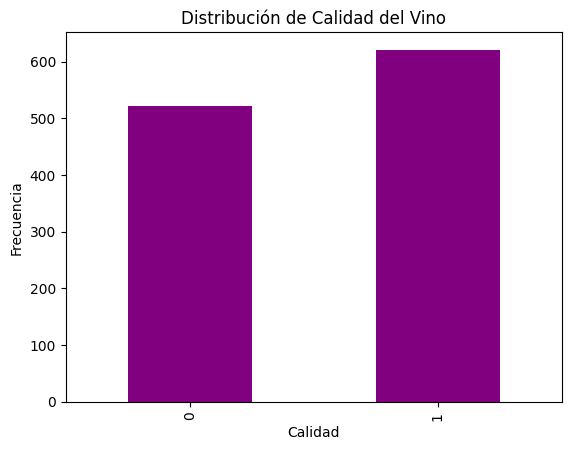

In [78]:
# Calcula e imprime la distribución de clases
clases, conteos = np.unique(dfwine_base.quality, return_counts=True)

# Bucle
for clase, conteo in zip(clases, conteos):
    print(f"Clase {clase}: {conteo} instancias")

# Calcula el porcentaje de clases
total_instancias = len(dfwine_base.quality)
for clase, conteo in zip(clases, conteos):
    porcentaje = (conteo / total_instancias) * 100
    print(f"Porcentaje de instancias de la clase {clase}: {porcentaje:.2f}%")

# Verificar la distribución de la variable "quality"
class_distribution = dfwine_base['quality'].value_counts().sort_index()
class_distribution.plot(kind='bar', color='purple')
plt.title('Distribución de Calidad del Vino')
plt.xlabel('Calidad')
plt.ylabel('Frecuencia')

plt.show()    

**Modelo Tree base**

In [79]:
from sklearn.tree import DecisionTreeClassifier #type:ignore
from sklearn.preprocessing import StandardScaler #type:ignore
from sklearn.model_selection import train_test_split #type:ignore

# Separar variables
X_base = dfwine_base.drop('quality', axis=1) 
y_base = dfwine_base['quality']
                  
# División del datasets base
X_train_base, X_test_base, y_train_base, y_test_base = train_test_split(X_base, y_base, stratify=y_base, random_state=42)

#Escalado
scalerbase = StandardScaler()

X_train_scalerbase = scalerbase.fit_transform(X_train_base) 
X_test_scalerbase = scalerbase.transform(X_test_base)

# Crear modelo
tree_base = DecisionTreeClassifier(random_state=42)

# Entrenar modelo
tree_base.fit(X_train_scalerbase, y_train_base)

# Predicciones
y_pred_tree_base= tree_base.predict(X_test_scalerbase)

# Mostrar los resultados
print("Classification Report:\n", classification_report(y_test_base, y_pred_tree_base))
print("-Std:", cross_val_score(tree_base, X_train_scalerbase, y_train_base).std())
print("-ROC AUC:",cross_val_score(tree_base, X_train_scalerbase, y_train_base, scoring='roc_auc').mean())

Classification Report:
               precision    recall  f1-score   support

           0       0.74      0.66      0.70       131
           1       0.74      0.81      0.77       155

    accuracy                           0.74       286
   macro avg       0.74      0.74      0.74       286
weighted avg       0.74      0.74      0.74       286

-Std: 0.029924911157391303
-ROC AUC: 0.6951266502220864


# **6. Pipeline**

In [81]:
from sklearn.model_selection import RandomizedSearchCV #type:ignore
from sklearn.pipeline import Pipeline #type:ignore
from sklearn.model_selection import train_test_split #type:ignore
from sklearn.preprocessing import RobustScaler #type:ignore
from sklearn.tree import DecisionTreeClassifier #type:ignore
from sklearn.ensemble import RandomForestClassifier #type:ignore
from sklearn.linear_model import LogisticRegression #type:ignore
from xgboost import XGBClassifier #type:ignore
import xgboost as xgb #type:ignore
from sklearn.svm import SVC #type:ignore
import catboost as catb #type:ignore
import catboost as CatBoostClassifier #type:ignore
from sklearn.ensemble import GradientBoostingClassifier #type:ignore
import scipy.stats as st #type:ignore
from scipy.stats import randint, uniform #type:ignore
from sklearn.model_selection import cross_val_score #type:ignore
from sklearn.model_selection import KFold #type:ignore
from sklearn.metrics import accuracy_score, f1_score, roc_auc_score #type:ignore

# Separación de variables
X=dfwine_fin.drop('quality',axis=1) 
y=dfwine_fin['quality'] 

# División del datasets modificado
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.2, random_state=42) 

# Crear pipelines para cada modelo
pipelines = {
    'Tree': Pipeline([('scaler', RobustScaler()), ('clf', DecisionTreeClassifier())]),
    'Forest': Pipeline([('scaler', RobustScaler()), ('clf', RandomForestClassifier())]),
    'Reglogist': Pipeline([('scaler', RobustScaler()), ('clf', LogisticRegression())]),
    'Xgboost': Pipeline([('scaler', RobustScaler()), ('clf', xgb.XGBClassifier())]),
    'Gradient': Pipeline([('scaler', RobustScaler()), ('clf', GradientBoostingClassifier())]),
    'Catboost': Pipeline([('scaler', RobustScaler()), ('clf', catb.CatBoostClassifier(verbose=0))]),
    'Svm': Pipeline([('scaler', RobustScaler()), ('clf', SVC(probability=True))])
}

# Definir hiperparámetros para búsqueda aleatoria
param_distributions = {
    'Tree': {
        'clf__random_state': st.randint(1, 100),
        'clf__min_samples_split': st.randint(2, 10),
        'clf__min_samples_leaf': st.randint(1, 100),
        'clf__max_depth': st.randint(1, 100),
        'clf__max_leaf_nodes': st.randint(10, 50),
        'clf__criterion': ['gini', 'entropy', 'log_loss'],
        'clf__splitter': ['best', 'random'],
        'clf__max_features': [None, 'sqrt', 'log2']
    },
    'Forest': {
        'clf__max_leaf_nodes': st.randint(2, 100),
        'clf__n_estimators': st.randint(1, 500),
        'clf__min_samples_split': st.randint(2, 10),
        'clf__min_samples_leaf': st.randint(1, 20),
        'clf__max_samples': st.uniform(0.1, 0.9),
        'clf__max_depth': st.randint(1, 100),
        'clf__random_state': st.randint(0, 100),
        'clf__oob_score': [True, False],
        'clf__class_weight': ['balanced', 'balanced_subsample'],
        'clf__max_features': ['sqrt', 'log2', None],
        'clf__criterion': ['gini', 'entropy', 'log_loss']
    },
    'Reglogist': {
        'clf__fit_intercept': [True, False],
        'clf__random_state': st.randint(0, 100),
        'clf__C': st.uniform(0.01, 10),
        'clf__multi_class': ['auto', 'ovr'],
        'clf__solver': ['lbfgs', 'liblinear', 'newton-cg', 'sag', 'saga']
    },
    'Xgboost': {
        'clf__n_estimators': st.randint(1, 500),
        'clf__max_depth': st.randint(1, 20),
        'clf__min_child_weight': st.randint(1, 20),
        'clf__colsample_bytree': st.uniform(0.1, 0.9),
        'clf__booster': ['gbtree', 'dart'],
        'clf__random_state': st.randint(0, 100),
        'clf__gamma': st.uniform(0.1, 0.9),
        'clf__learning_rate': st.uniform(0.01, 0.9)
    },
    'Gradient': {
        'clf__n_estimators': st.randint(1, 500),
        'clf__max_depth': st.randint(1, 10),
        'clf__min_samples_split': st.randint(2, 20),
        'clf__min_samples_leaf': st.randint(1, 20),
        'clf__random_state': st.randint(0, 100),
        'clf__subsample': st.uniform(0.1, 0.9),
        'clf__criterion': ['friedman_mse', 'squared_error'],
        'clf__learning_rate': st.uniform(0.01, 0.99)
    },
    'Catboost': {
        'clf__iterations': st.randint(1, 500),
        'clf__depth': st.randint(1, 16),
        'clf__l2_leaf_reg': st.uniform(1, 10),
        'clf__random_strength': st.uniform(1, 10), 
        'clf__bootstrap_type': ['Bayesian', 'Bernoulli', 'MVS'],
        'clf__eval_metric': ['Accuracy', 'AUC', 'F1'],
        'clf__loss_function': ['Logloss', 'CrossEntropy'],
        'clf__random_state': st.randint(0, 100),
        'clf__learning_rate': st.uniform(0.01, 0.9)
    },
    'Svm': {
        'clf__kernel': ['linear', 'poly', 'rbf', 'sigmoid'],
        'clf__decision_function_shape': ['ovo', 'ovr'],
        'clf__C': st.randint(1, 100),
        'clf__degree': st.randint(2, 10),
        'clf__gamma': st.uniform(0.01, 1),
        'clf__cache_size': st.randint(100, 1000),
        'clf__tol': st.uniform(0.001, 1)
    }
}

# Kfold
kf = KFold(n_splits=5, shuffle=True, random_state=42)

# Realizar búsqueda aleatoria para cada modelo
random_searches = {name: RandomizedSearchCV(pipelines[name], param_distributions[name], n_iter=50, cv=kf, random_state=42, n_jobs=-1, error_score='raise')
                   for name in pipelines.keys()}

# Ajustar modelos y almacenar métricas y mejores parámetros
metrics_results = []
best_params_results = []
best_model = None 
best_score = -np.inf 

for name, search in random_searches.items():
    search.fit(X_train, y_train)
    model = search.best_estimator_

    # Métricas
    cv_accuracies = cross_val_score(model, X_train, y_train, cv=kf, scoring='accuracy')
    cv_f1_scores = cross_val_score(model, X_train, y_train, cv=kf, scoring='f1')
    cv_recall = cross_val_score(model, X_train, y_train, cv=kf, scoring='recall')
    cv_precis = cross_val_score(model, X_train, y_train, cv=kf, scoring='precision')
    cv_roc_aucs = cross_val_score(model, X_train, y_train, cv=kf, scoring='roc_auc')
    model_std = np.std(cv_roc_aucs)

    # Resultados
    metrics_results.append({
        'Model': name,
        'Accuracy': cv_accuracies.mean(),
        'F1 Score': cv_f1_scores.mean(),
        'Recall': cv_recall.mean(),
        'Precision': cv_precis.mean(),
        'Roc auc': cv_roc_aucs.mean(),
        'Std': model_std
    })

    best_params_results.append({
        'Model': name,
        'Mejores Parámetros': search.best_params_
    })

# Crear dataframes y mostrar resultados
df_met = pd.DataFrame(metrics_results)
df_best_params = pd.DataFrame(best_params_results)

# Normalizar las métricas (excluyendo la columna "Model")
metrics_to_normalize = df_met.drop(columns=['Model'])
norm_met = (metrics_to_normalize - metrics_to_normalize.mean()) / metrics_to_normalize.std()

# Añadir la columna "Model" de nuevo al dataframe normalizado
norm_met['Model'] = df_met['Model']

# Calcular la puntuación total
norm_met['Total Score'] = norm_met['Accuracy'] + norm_met['F1 Score'] + norm_met['Recall']
+ norm_met['Precision'] + norm_met['Roc auc'] - norm_met['Std']

# Seleccionar el mejor modelo basado en la puntuación total
best_model_name = norm_met.loc[norm_met['Total Score'].idxmax(), 'Model'] # Captura el valor máximo
best_model = random_searches[best_model_name].best_estimator_
best_score = norm_met['Total Score'].max()

print("Mejores parámetros:")
print(df_best_params.to_string(index=False)) # Se ignora índice

print("\nPerfomance metricas:")
print(df_met.to_string(index=False))

Mejores parámetros:
    Model                                                                                                                                                                                                                                                                                                                  Mejores Parámetros
     Tree                                                                                                             {'clf__criterion': 'log_loss', 'clf__max_depth': 18, 'clf__max_features': None, 'clf__max_leaf_nodes': 23, 'clf__min_samples_leaf': 9, 'clf__min_samples_split': 3, 'clf__random_state': 53, 'clf__splitter': 'random'}
   Forest {'clf__class_weight': 'balanced_subsample', 'clf__criterion': 'entropy', 'clf__max_depth': 87, 'clf__max_features': 'sqrt', 'clf__max_leaf_nodes': 97, 'clf__max_samples': 0.9174392973699883, 'clf__min_samples_leaf': 19, 'clf__min_samples_split': 7, 'clf__n_estimators': 130, 'clf__oob_score': True, 'cl

In [82]:
best_model

Pipeline(steps=[('scaler', RobustScaler()),
                ('clf',
                 <catboost.core.CatBoostClassifier object at 0x00000298A8EF7AD0>)])

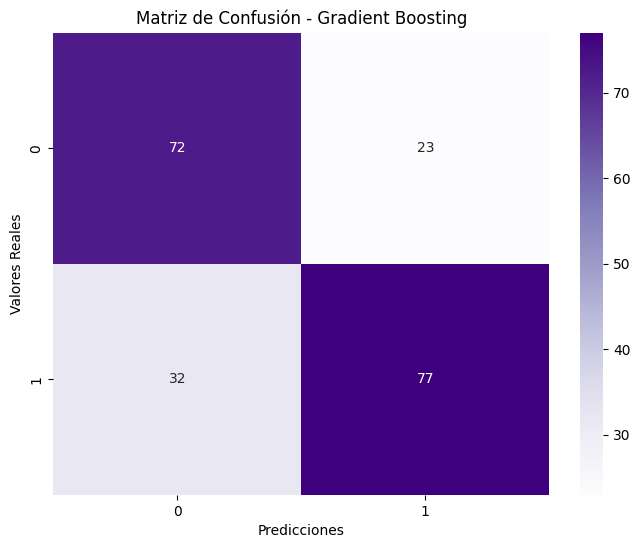

In [61]:
from sklearn.metrics import confusion_matrix #type:ignore

# Predecir
y_pred_svm = best_model.predict(X_test) 

# Matriz de Confusión
conf_matrix = confusion_matrix(y_test, y_pred_svm)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Purples')
plt.title('Matriz de Confusión - Gradient Boosting')
plt.xlabel('Predicciones')
plt.ylabel('Valores Reales')
plt.show()


# **7. Shap**

In [83]:
import shap #type:ignore

#Funcion de envoltura (wrapper) para pipeline
def model_predict(X):
    return best_model.predict(X)

# Generar gráficos SHAP
explainer = shap.Explainer(model_predict, X_train)
shap_values = explainer(X_train)


ExactExplainer explainer: 815it [00:22, 20.03it/s]                         


In [84]:
#Visualizaciones
shap.initjs() #Entorno JavaScript
shap.plots.force(shap_values[3],figsize=(15, 3)) #Ingresar en "[]" el número de muestra a visualizar. 

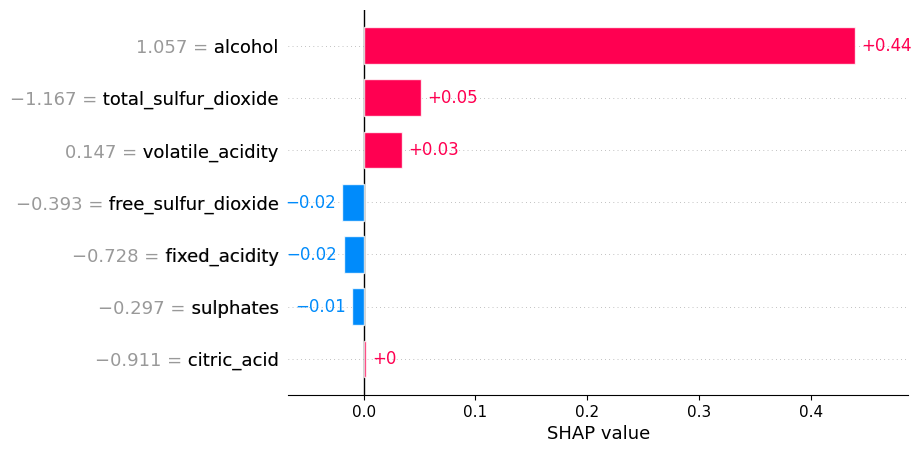

In [85]:
shap.plots.bar(shap_values[3]) #Ingresar en "[]" el número de muestra a visualizar. 

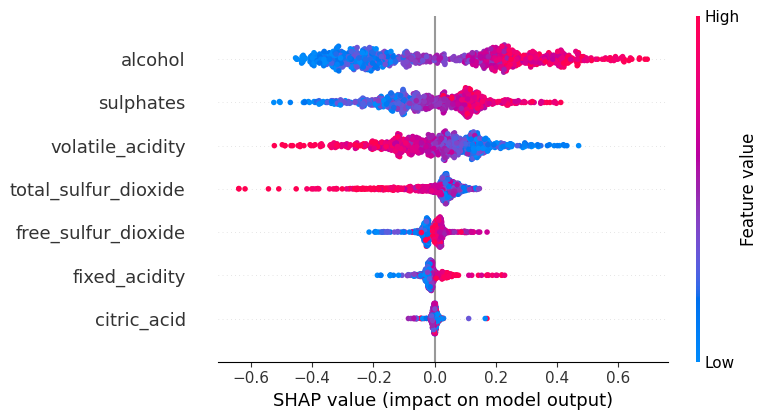

In [86]:
shap.summary_plot(shap_values)

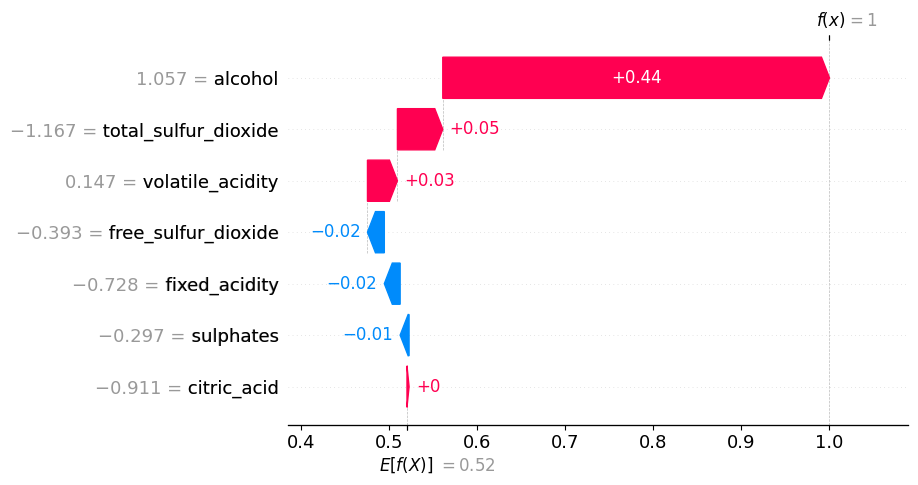

In [87]:
shap.plots.waterfall (shap_values[3]) #Ingresar en "[]" el número de muestra a visualizar. 

**Dependencia parcial**

In [88]:
dfwine_fin.columns

Index(['fixed_acidity', 'volatile_acidity', 'citric_acid',
       'free_sulfur_dioxide', 'total_sulfur_dioxide', 'sulphates', 'alcohol',
       'quality'],
      dtype='object')

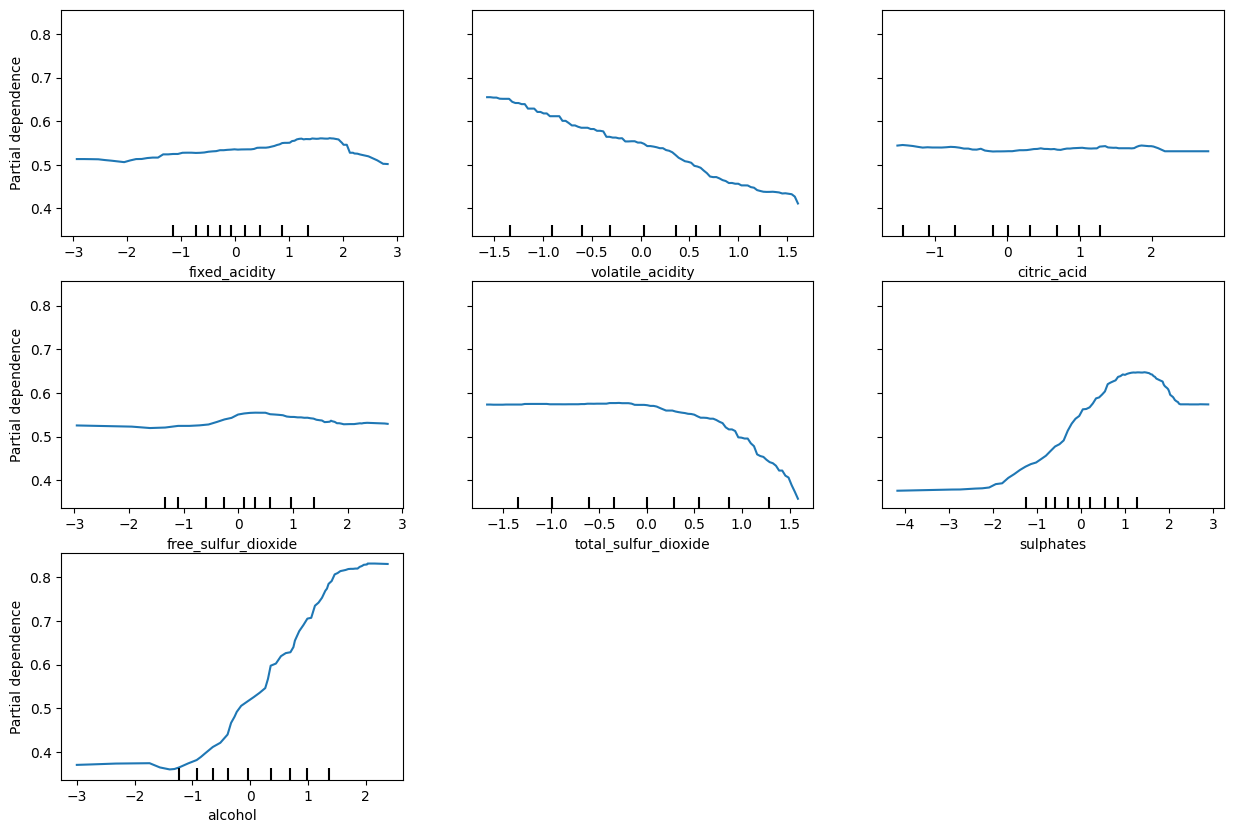

In [99]:
from sklearn.inspection import PartialDependenceDisplay #type:ignore

feature_to_plot=[0, 1, 2, 3, 4, 5, 6] # Variables de interes.
fig, ax = plt.subplots(figsize=(15, 10))
PartialDependenceDisplay.from_estimator(best_model, X_train, feature_to_plot, ax=ax)

plt.show()

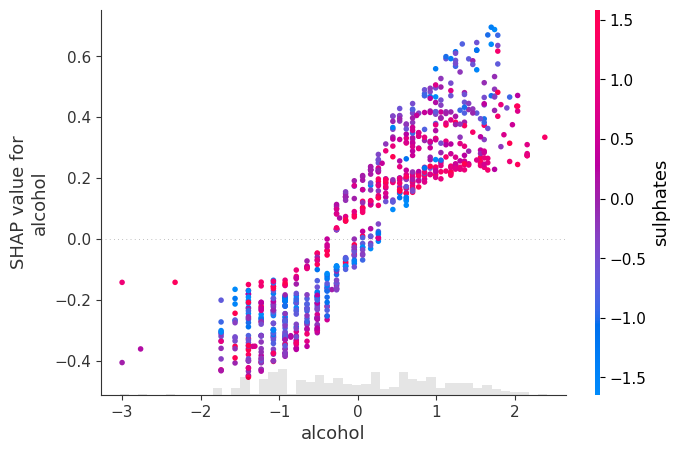

In [90]:
shap.plots.scatter(shap_values[:,6], color=shap_values) #Ingresar en "[]" el número de variable a visualizar. 

# **8. Portabilidad**

In [91]:
import joblib #type:ignore

In [98]:
joblib.dump(best_model, 'best_model.joblib')

['best_model.joblib']

In [97]:
joblib.dump(pt, 'yeo_transf.joblib')

['yeo_transf.joblib']

In [96]:
joblib.dump(scaler, 'robust_scaler.joblib')

['robust_scaler.joblib']

# **9. Librerias**


In [159]:
!pip list

Package                   Version
------------------------- --------------
absl-py                   2.1.0
altair                    5.2.0
annotated-types           0.6.0
arrow                     1.3.0
asttokens                 2.4.0
attrs                     23.1.0
backcall                  0.2.0
beautifulsoup4            4.12.2
blinker                   1.6.3
cachetools                5.3.3
cassandra-driver          3.28.0
catboost                  1.2.3
certifi                   2023.7.22
charset-normalizer        3.3.0
classifier                2.0
click                     8.1.7
click-plugins             1.1.1
cligj                     0.7.2
cloudpickle               3.0.0
colorama                  0.4.6
comm                      0.1.4
contourpy                 1.1.1
cs50                      9.2.7
cycler                    0.12.1
dash                      2.16.1
dash-core-components      2.0.0
dash-html-components      2.0.0
dash-table                5.0.0
dask                  


[notice] A new release of pip is available: 24.0 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


# **10. Streamlit**

In [ ]:
#Wine_st.py